In [1]:
%matplotlib inline

import numpy as np

import pandas as pd
from pandas_datareader import data

import matplotlib.pyplot as plt
import matplotlib.finance as mfinance
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.transforms as mtransforms

from statsmodels import stats
import scipy.optimize as opt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,LinearRegression

import theano
import theano.tensor as T

In [31]:
from_date = '2016-01-01'
to_date = '2016-03-01'
symbols = ['AAPL','GOOG','AMZN','FB','MSFT']
stocks = {}
for symbol in symbols:
    stocks[symbol] = data.DataReader(symbol,'yahoo',from_date,to_date)
benchmark = data.DataReader('SPY','yahoo',from_date,to_date)

In [129]:
class Order(object):
    def __init__(self):
        pass
    
class MarketOrder(Order):
    def __init__(self,symbol,amount):
        self._symbol = symbol
        self._amount = amount

class LimitOrder(Order):
    def __init__(self,symbol,price,amount):
        self._symbol = symbol
        self._price = price
        self._amount = amount

class Stock(object):
    def __init__(self,symbol,data):
        self._symbol = symbol
        self._data = data
    def compute_alpha_beta(self,benchmark):
        ret = self._data['Close'].pct_change()[1:].values.reshape(-1,1)
        benchmart_ret = benchmark['Close'].pct_change()[1:].values.reshape(-1,1)
        reg = LinearRegression()
        reg.fit(X=benchmart_ret,y=ret)
        self._beta = reg.coef_[0,0]
        self._alpha = reg.intercept_[0]
    
class Strategy(object):
    def __init__(self):
        pass
    def isEnter(self,symbol,data):
        pass
    def isExit(self,symbol,data):
        pass
    
class Portfolio(object):
    def __init__(self):
        self._assets = {}
    def add_asset(symbol,amount):
        self._assets[symbol] = self._assets.get(symbol,0) + amount
    def remove_asset(symbol,amount):
        self._assets[symbol] -= amount
    
class Context(object):
    def __init__(self):
        self._initial_cash = 0.
        self._portfolio = Portfolio()
        self.
    
class QSystem(object):
    
    def __init__(self,from_date,to_date,data,benchmark,initial_cash):
        self._data = data
        self._benchmark = benchmark
        self._from_date = from_date
        self._to_date = to_date
        self._initial_cash = initial_cash
        self._orders = []
    def run(self,handle_data):
        self._handle_data = handle_data
        
        _context = Context()
        _context.portfolio = Portfolio()
        _context.order = self._order
        
        _from = pd.Timestamp(self._from_date)
        _to = pd.Timestamp(self._to_date)
        _delta = pd.Timedelta(days=1)
        while _from != _to:
            _from += _delta
            _temp_data = {}
            for symbol in self._data:
                _temp_data[symbol] = self._data[symbol][:_from]
            self._process_handle_data(_context,pd.Panel(_temp_data))
            self._process_order(_from)
    
    def _order(self,order):
        self._orders.append(order)
    
    def _process_handle_data(self,context,data):
        self._handle_data(context,data)
    
    def _process_order(self,current_date):
        while len(self._orders) > 0:
            order = self._orders.pop()
            if isinstance(order,MarketOrder):
                try:
                    open_price = self._data[order._symbol]['Open'][current_date]
                    if order._amount > 0:
                        self._process_buying(order._symbol,open_price,order._amount)
                    else:
                        self._process_selling(order._symbol,open_price,order._amount)
                except KeyError:
                    print 'Not available date',current_date
            elif isinstance(order,LimitOrder):
                try:
                    high_price = self._data[order._symbol]['High'][current_date]
                    low_price = self._data[order._symbol]['Low'][current_date]           
                    if order._amount > 0:
                        self._process_buying(order._symbol,order._price,order._amount)
                    else:
                        self._process_selling(order._symbol,order._price,order._amount)
                except KeyError:
                    print 'Not available date',current_date
            else:
                print 'none'
        
    def _process_buying(self,symbol,price,amount):
        pass
        
    def _process_selling(self,symbol,price,amount):
        pass
        
def handle_data(context,data):
    context.order(MarketOrder('AAPL',100))
        
q = QSystem(from_date,to_date,stocks,benchmark,1000)  
q.run(handle_data)


Not available date 2016-01-02 00:00:00
Not available date 2016-01-03 00:00:00
Not available date 2016-01-09 00:00:00
Not available date 2016-01-10 00:00:00
Not available date 2016-01-16 00:00:00
Not available date 2016-01-17 00:00:00
Not available date 2016-01-18 00:00:00
Not available date 2016-01-23 00:00:00
Not available date 2016-01-24 00:00:00
Not available date 2016-01-30 00:00:00
Not available date 2016-01-31 00:00:00
Not available date 2016-02-06 00:00:00
Not available date 2016-02-07 00:00:00
Not available date 2016-02-13 00:00:00
Not available date 2016-02-14 00:00:00
Not available date 2016-02-15 00:00:00
Not available date 2016-02-20 00:00:00
Not available date 2016-02-21 00:00:00
Not available date 2016-02-27 00:00:00
Not available date 2016-02-28 00:00:00


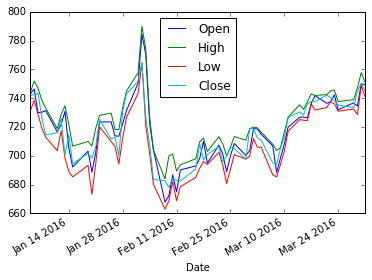

In [7]:
s._raw_data[s._raw_data.columns[:4]].plot()

In [ ]:
class stock(object):
    def __init__(self,symbol,from_date,to_date):
        self.raw_data = data.DataReader(symbol,'yahoo',from_date,to_date)
        self.ret = np.array(self.raw_data['Close'].pct_change()[1:].tolist())
    def compute_alpha_beta(self,benchmark_index):
        benchmark_index_ret = np.array(benchmark_index).reshape(len(benchmark_index),1)
        target_ret = self.ret.reshape(len(self.ret),1)
        reg = LinearRegression()
        reg.fit(X=benchmark_index_ret,y=target_ret)
        self.beta = reg.coef_[0,0]
        self.alpha = reg.intercept_[0]

In [2]:
symbol = 'GOOG'
from_date = '2016-01-01'
to_date = '2016-03-31'
goog_data = data.DataReader(symbol,'yahoo',from_date,to_date)

In [3]:
def show_chart(prices,indicators=None,moving_average=None,buying_history=None,selling_history=None):

    dates = [ mdates.date2num(date) for date in prices.index]
    open_prices = prices['Open']
    high_prices = prices['High']
    low_prices = prices['Low']
    close_prices = prices['Close']
    volumes = prices['Volume'] if 'Volume' in prices.columns else None

    chart_data = np.matrix([dates,open_prices,high_prices,low_prices,close_prices]).T.tolist()

    fig = plt.figure(figsize=(15,8))
    ax1 = plt.subplot2grid((5,4),(0,0),rowspan=4,colspan=4)
    mfinance.candlestick_ohlc(ax1,chart_data,colorup='r',colordown='b',alpha=0.7)
    ax1.grid(True)
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.ylabel('Price')
    
    ax2 = plt.subplot2grid((5,4),(4,0),sharex=ax1,rowspan=1,colspan=4)
    ax2.grid(True)

#     if buying_history is not None and len(buying_history) > 0:
#         dx, dy = -3/72., 0.
#         offset = mtransforms.ScaledTranslation(dx, dy,fig.dpi_scale_trans)
#         shadow_transform = ax1.transData + offset

#         buying_dates = [ mdates.date2num(date) for date in buying_history.index]
#         ax1.plot(buying_dates,buying_history.values,'r>',transform=shadow_transform)

#     if selling_history is not None and len(selling_history) > 0:
#         dx, dy = +3/72., 0.
#         offset = mtransforms.ScaledTranslation(dx, dy,fig.dpi_scale_trans)
#         shadow_transform = ax1.transData + offset

#         selling_dates = [ mdates.date2num(date) for date in selling_history.index]
#         ax1.plot(selling_dates,selling_history.values,'b<',transform=shadow_transform)

#     if moving_average is not None:
#         for w in moving_average:
#             ma = sma(close_prices,w)
#             ax1.plot(dates[-len(ma):],ma)

#     if indicators is not None and 'bollinger' in indicators:
#         middle,upper,lower = bollinger_bands(close_prices)
#         ax1.plot(dates[-len(middle):],middle)
#         ax1.plot(dates[-len(upper):],upper)
#         ax1.plot(dates[-len(lower):],lower)
#     if indicators is not None and 'macd' in indicators:
#         macd_line,macd_signal,macd_hist,ma_long,ma_short = macd(close_prices)
#         ax2.plot(dates[-len(macd_line):],macd_line)
#         ax2.plot(dates[-len(macd_signal):],macd_signal)
#         ax2.bar(dates[-len(macd_hist):],macd_hist)
#         ax2.axes.yaxis.set_ticklabels([])
#         plt.ylabel('MACD')
#     elif indicators is not None and 'rsi' in indicators:
#         r,s = rsi(close_prices)
#         ax2.plot(dates[-len(r):],r)
#         ax2.plot(dates[-len(s):],s)
#         plt.ylabel('RSI')
#     elif volumes is not None:
#         plt.ylabel('Volume')
#         ax2.bar(dates[-len(volumes):],volumes)
#         ax2.axes.yaxis.set_ticklabels([])

    fig.subplots_adjust(hspace=0)
    plt.setp( plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.setp(ax1.get_xticklabels(),visible=False)
    ax1.set_yticks(ax1.get_yticks()[1:])
    return ax1,ax2
#     plt.show()


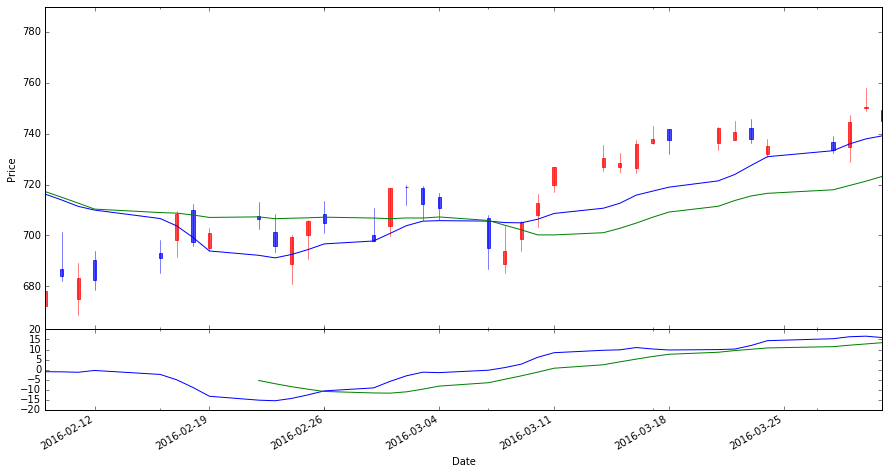

In [9]:
prices = goog_data['Close']
sma_short_window = 12
sma_long_window = 26
signal_window = 9
ma1 = pd.rolling_mean(goog_data['Close'],window=sma_short_window).dropna()
ma2 = pd.rolling_mean(goog_data['Close'],window=sma_long_window).dropna()

pd.ro

diff = (ma1 - ma2).dropna()
signal = pd.rolling_mean(diff,window=signal_window).dropna()

ax1,ax2 = show_chart(goog_data[goog_data.columns[:5]])
ma1.plot(ax=ax1)
ma2.plot(ax=ax1)

diff.plot(ax=ax2)
signal.plot(ax=ax2)

# (ma1 - ma2).dropna().plot(ax=ax2,kind='bar')